# HipoMap Library

```HipoMap library``` is a Tool that uses WSI to create and classify representation map for distinguishing between Cancer WSI and Normal WSI.

## Generating HipoMap(representation map based on Whole Slide Image)

For generating representation map, We can use the model we provide, the model you train, or the model from Keras.

The pre-trained model required to learn the presentation map can be obtained using three methods below.

1. using pre-trained model provided by keras : ```tensorflow.keras.applications```

2. using pre-trained model provided by us : downloaded from aaa

3. using pre-trained model by user

In the case of option 2,3, you have to load pretrained model by ```tensorflow.keras.models.load_model```, and then generate representation map through ```HipoMap.hipoMap.generateHipoMap```.

In [3]:
from hipomap import generateHipoMap, draw_represent
from tensorflow.keras.models import load_model

hipomodel = load_model("/home/yeon/model.h5")
generateHipoMap("/home/yeon/Data/", "/home/yeon/Result_hipo", model=hipomodel, layer_name="mixed10", patch_size=(299,299))

ModuleNotFoundError: No module named 'hipomap'

## Draw HeatMap from Representation map with Top K (Visualization)

The representation map generated by ```HipoMap.hipoMap.generateHipoMap``` is a gradcam score matrix sorted in ascending order in patches after ascending order to feature in the activation map.

When visualizing a representation map, the more top-left it is, the brighter it is.

In HipoMap library, it can be visualization heatmap using ```HipoMap.hipoMap.draw_represent```.

```HipoMap.hipoMap.draw_represent``` Parameters

- directory path saved representation map
- ```K``` 
- ```max_value```  : Values to anchor the colormap
- ```save``` : Whether to save heatmap (.png)

/home/yeon/Testttt/Test3/TCGA-75-5126-01Z-00-DX1.npy


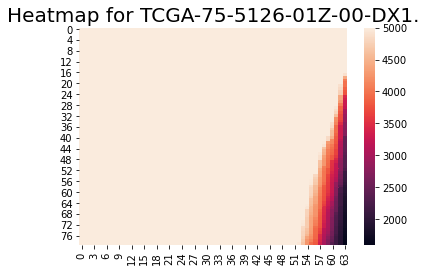

<Figure size 432x288 with 0 Axes>

/home/yeon/Testttt/Test3/.ipynb_checkpoints
/home/yeon/Testttt/Test3/TCGA-49-4505-01Z-00-DX1.npy


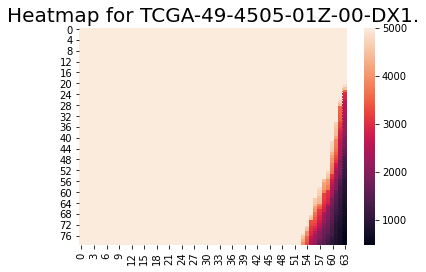

<Figure size 432x288 with 0 Axes>

In [2]:
draw_represent("/home/yeon/Testttt/Test3/", K=80, max_value=5000, save=True)

## Classification based on Representation map

Except for outliers, most Cancer WSIs have a wide range of high values in top-left, and Normal WSIs have a narrow range of high values in top-left.

It can be possible to clssify using by SimpleCNN model,

In ```HipoMap library```, classifying through ```hipoClassify```.

There are two options in ```HipoMap.hipoClassify```.

1. Classification using ```predict_with_sample``` function with pretrained model given by us.

2. If you want to train by Train/Validation/Test set with enough data, classifying Test dataset by ```predict_with_test``` function after training SimpleCNN with ```fit``` function.

In [3]:
from HipoMap.classify import HipoClass

classifier = HipoClass(K=50, activation_size=64, ismodel=True, modelpath="/home/yeon/TryPackage/classifier.h5")
prediction, classes = classifier.predict_with_sample('/home/yeon/Testttt/Test3/')

In [4]:
prediction

[array([[1.]], dtype=float32), array([[1.]], dtype=float32)]

In [5]:
classes

['Cancer', 'Cancer']

## Classification based on Representation map

Except for outliers, most Cancer WSIs have a wide range of high values in top-left, and Normal WSIs have a narrow range of high values in top-left.

It can be possible to clssify using by SimpleCNN model,

In ```HipoMap library```, classifying through ```hipoClassify```.

There are two options in ```HipoMap.hipoClassify```.

1. Classification using ```predict_with_sample``` function with pretrained model given by us.

2. If you want to train by Train/Validation/Test set with enough data, classifying Test dataset by ```predict_with_test``` function after training SimpleCNN with ```fit``` function.

In [6]:
from HipoMap.scoring import scoring_probmap

scoring_probmap(path_model='/home/yeon/HIPO_MAP/HipoMap/new_modelct.h5',
                path_data="/home/yeon/DataFolder/Dataset/Test2/",
                path_save="/home/yeon/Testttt/Test3_score/"
               )

TCGA-49-4505-01Z-00-DX1.svs
1
TCGA-75-5126-01Z-00-DX1.svs
0


In [9]:
import numpy as np
score_array = np.load("/home/yeon/Testttt/Test3_score/TCGA-49-4505-01Z-00-DX1_new.npy")
print(score_array)
print(score_array.shape)

[[ 0.72196513 25.          1.        ]
 [ 0.44580749 26.          1.        ]
 [ 0.78671938 27.          1.        ]
 ...
 [ 0.40801316 39.         80.        ]
 [ 0.23482636 40.         80.        ]
 [ 0.75683939 41.         80.        ]]
(2714, 3)


.ipynb_checkpoints
TCGA-49-4505-01Z-00-DX1_new.npy
TCGA-75-5126-01Z-00-DX1_new.npy
TCGA-49-4505-01Z-00-DX1.svs
TCGA-49-4505-01Z-00-DX1_new.npy
1
TCGA-75-5126-01Z-00-DX1_new.npy
TCGA-75-5126-01Z-00-DX1.svs
TCGA-49-4505-01Z-00-DX1_new.npy
TCGA-75-5126-01Z-00-DX1_new.npy
0


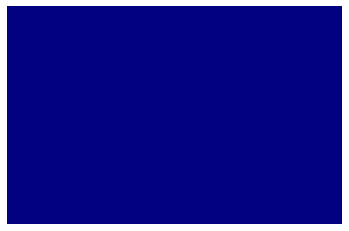

In [1]:
from HipoMap.probmap import generating_probmap

generating_probmap(path_data="/home/yeon/DataFolder/Dataset/Test2/",
                   path_prob="/home/yeon/Testttt/Test3_score/",
                   path_save="/home/yeon/Testttt/Test3_probheat/"
                  )

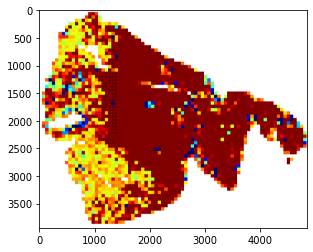

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as img
im = img.imread("/home/yeon/Testttt/Test3_probheat/4505-DX1.png")
plt.imshow(im)
plt.show()

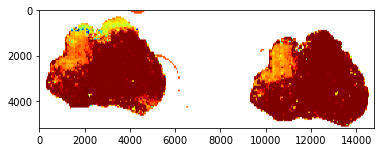

In [9]:
im = img.imread("/home/yeon/Testttt/Test3_probheat/-DX1.png")
plt.imshow(im)
plt.show()